In [1]:
import random
import sys

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Lab 2 - Classification

## Data import

In [3]:
df = pd.read_csv("wine-quality.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## N/A handling

In [5]:
df.fillna(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Visualization

<AxesSubplot:>

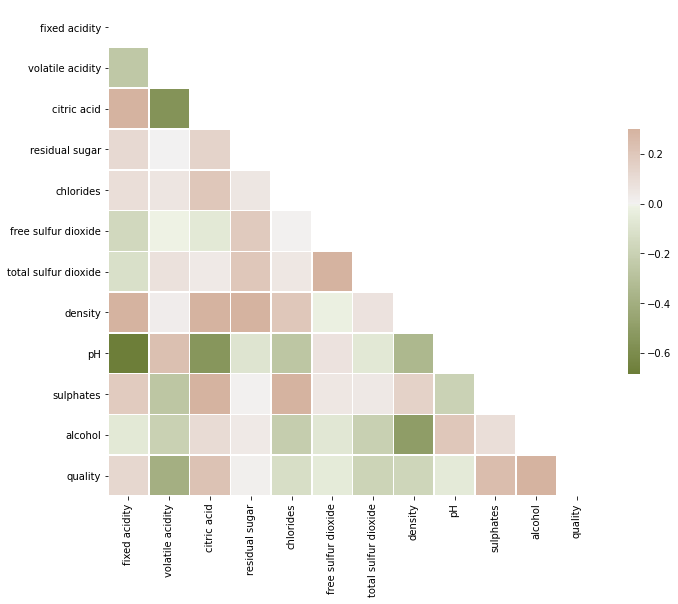

In [6]:
f, ax = plt.subplots(figsize=(11, 9))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 30, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

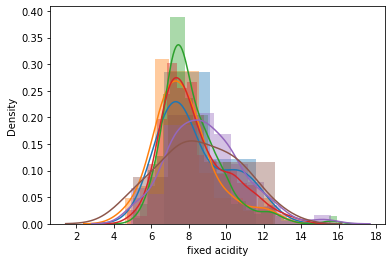

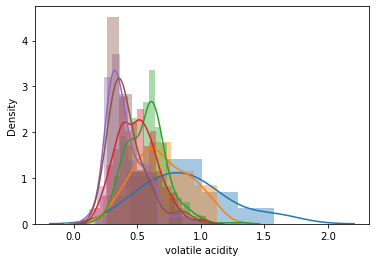

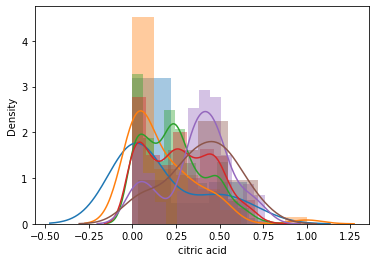

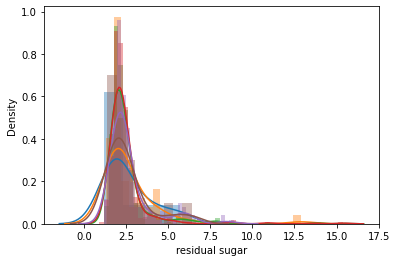

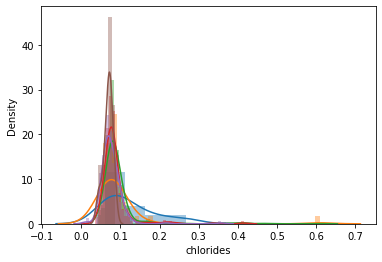

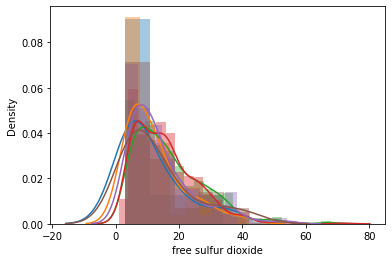

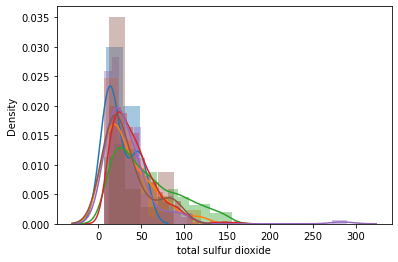

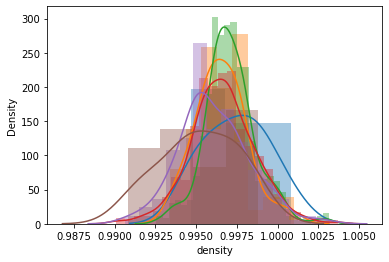

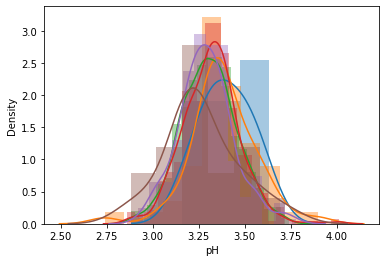

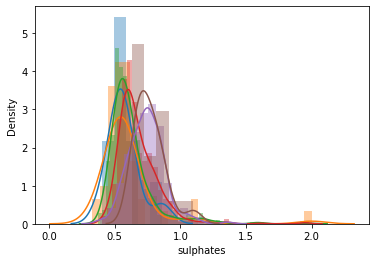

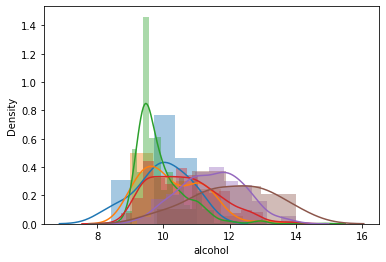

<Figure size 432x288 with 0 Axes>

In [7]:
import warnings
warnings.filterwarnings('ignore')

cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for column in cols[:-1]:
    for i in [3,4,5,6,7,8]:
        
        x = df[column][df["quality"] == i]
        sns.distplot(x)
    plt.figure()

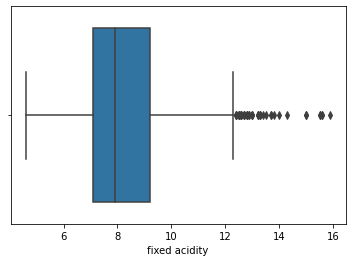

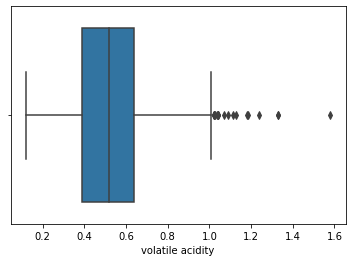

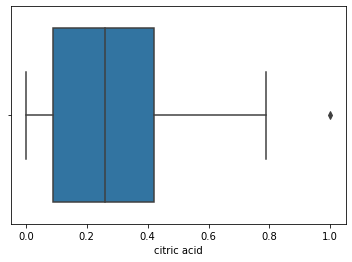

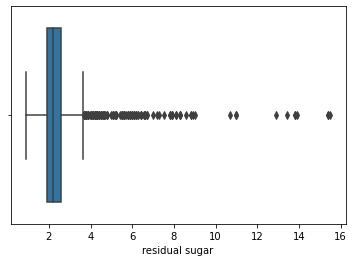

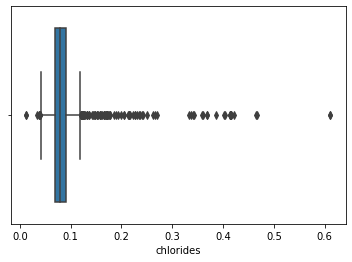

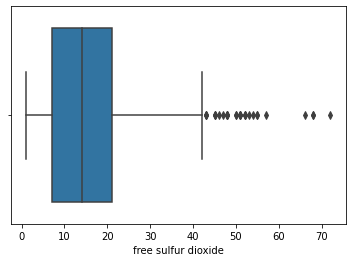

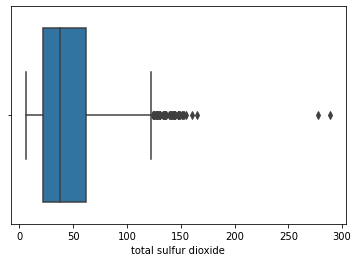

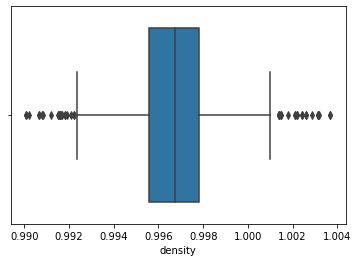

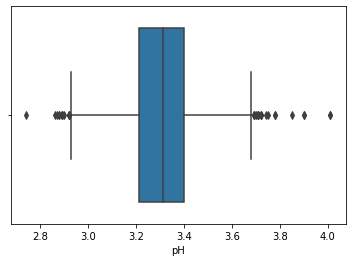

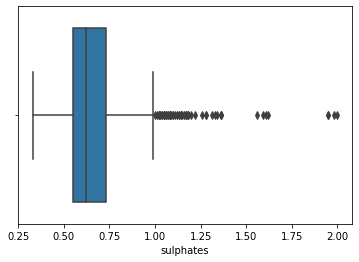

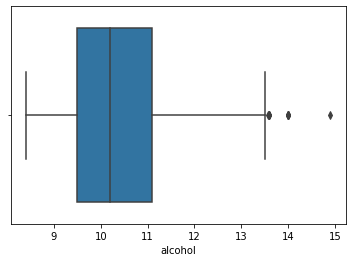

<Figure size 432x288 with 0 Axes>

In [8]:
for column in cols[:-1]:
    sns.boxplot(df[column])
    plt.figure()

### Normalization

In [9]:
for column in cols[:-1]:
    df[column] = (df[column] - df[column].mean())/df[column].std()

---

# Classification

In [10]:
Y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values

num_samples = X.shape[0]
train_samples = int(0.8*num_samples)
indexes = np.arange(num_samples)
random.shuffle(indexes)

X, Y = X[indexes], Y[indexes]
X_train, Y_train = X[:train_samples, :], Y[:train_samples]
X_test, Y_test = X[train_samples:, :], Y[train_samples:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1279, 11) (1279,)
(320, 11) (320,)


### KNN - Classifier

<AxesSubplot:xlabel='k_neighbores', ylabel='f1_scores'>

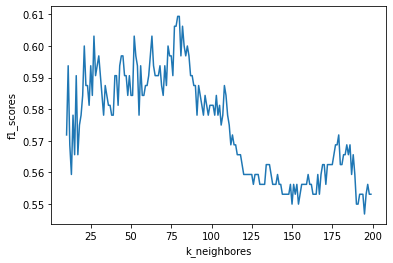

In [11]:
scores = list()
neighbors = list()

for i in range(10, 200):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    Y_predict = neigh.predict(X_test)
    _score = f1_score(Y_predict, Y_test, average="micro")
    scores.append(_score)
    neighbors.append(i)
    
df = pd.DataFrame({"f1_scores": scores, "k_neighbores": neighbors})
sns.lineplot(y="f1_scores", x="k_neighbores", data=df)

---

## Decision Tree - Classifier

In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))

target_names = ['class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8']

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))

Confusion matrix SVC linear :
[[ 0  1  0  1  0  0]
 [ 0  0  8  1  0  0]
 [ 0  6 93 31  8  0]
 [ 0  5 27 79 12  1]
 [ 0  2  7 11 22  0]
 [ 0  0  0  2  2  1]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 3       0.00      0.00      0.00         2
     class 4       0.00      0.00      0.00         9
     class 5       0.69      0.67      0.68       138
     class 6       0.63      0.64      0.63       124
     class 7       0.50      0.52      0.51        42
     class 8       0.50      0.20      0.29         5

    accuracy                           0.61       320
   macro avg       0.39      0.34      0.35       320
weighted avg       0.62      0.61      0.61       320



---

## Support Vector Machine - Classifier

### Linear

In [13]:
parameters = {'C': [1, 10, 100]}
neigh = SVC(kernel='linear')

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))

target_names = ['class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8']

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix SVC linear :
[[  0   0   2   0   0   0]
 [  0   0   7   2   0   0]
 [  0   0 112  26   0   0]
 [  0   0  44  80   0   0]
 [  0   0   3  39   0   0]
 [  0   0   0   5   0   0]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 3       0.00      0.00      0.00         2
     class 4       0.00      0.00      0.00         9
     class 5       0.67      0.81      0.73       138
     class 6       0.53      0.65      0.58       124
     class 7       0.00      0.00      0.00        42
     class 8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.20      0.24      0.22       320
weighted avg       0.49      0.60      0.54       320

{'C': 1}


### RBF

In [14]:
parameters = {'C': [1, 10, 100], 'gamma': [0.001, 0.1, 1]}
neigh = SVC(kernel='rbf')

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC rbf :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix SVC rbf :
[[  0   0   1   1   0   0]
 [  0   0   6   3   0   0]
 [  0   0 103  34   1   0]
 [  0   0  30  91   3   0]
 [  0   0   5  22  15   0]
 [  0   0   0   4   1   0]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 3       0.00      0.00      0.00         2
     class 4       0.00      0.00      0.00         9
     class 5       0.71      0.75      0.73       138
     class 6       0.59      0.73      0.65       124
     class 7       0.75      0.36      0.48        42
     class 8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.34      0.31      0.31       320
weighted avg       0.63      0.65      0.63       320

{'C': 1, 'gamma': 1}


---

# Ensemble

## Random forest

In [22]:
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90]}
neigh = RandomForestClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix Random Forest :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report Random Forest :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix Random Forest :
[[  0   0   1   1   0   0]
 [  0   0   6   3   0   0]
 [  0   0 114  23   1   0]
 [  0   0  29  89   6   0]
 [  0   0   2  19  21   0]
 [  0   0   0   2   3   0]]
Classification report Random Forest :
              precision    recall  f1-score   support

     class 3       0.00      0.00      0.00         2
     class 4       0.00      0.00      0.00         9
     class 5       0.75      0.83      0.79       138
     class 6       0.65      0.72      0.68       124
     class 7       0.68      0.50      0.58        42
     class 8       0.00      0.00      0.00         5

    accuracy                           0.70       320
   macro avg       0.35      0.34      0.34       320
weighted avg       0.66      0.70      0.68       320

{'n_estimators': 40}


## Adaboost

In [23]:
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90], "learning_rate": [0.01, 0.1, 0.5, 1]}
neigh = AdaBoostClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix AdaBoost :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report AdaBoost :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix AdaBoost :
[[  0   0   2   0   0   0]
 [  0   0   7   2   0   0]
 [  0   1 104  33   0   0]
 [  0   0  48  74   2   0]
 [  0   0   3  34   4   1]
 [  0   0   0   4   1   0]]
Classification report AdaBoost :
              precision    recall  f1-score   support

     class 3       0.00      0.00      0.00         2
     class 4       0.00      0.00      0.00         9
     class 5       0.63      0.75      0.69       138
     class 6       0.50      0.60      0.55       124
     class 7       0.57      0.10      0.16        42
     class 8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.28      0.24      0.23       320
weighted avg       0.54      0.57      0.53       320

{'learning_rate': 0.1, 'n_estimators': 80}


## Gradient boost

In [28]:
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90], "learning_rate": [0.01, 0.1, 0.5, 1]}
neigh = GradientBoostingClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix Gradient Boosting :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report Gradient Boosting :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix Gradient Boosting :
[[  0   1   0   1   0   0]
 [  1   0   6   2   0   0]
 [  1   2 109  25   1   0]
 [  1   0  34  81   7   1]
 [  0   0   3  18  21   0]
 [  0   0   0   2   3   0]]
Classification report Gradient Boosting :
              precision    recall  f1-score   support

     class 3       0.00      0.00      0.00         2
     class 4       0.00      0.00      0.00         9
     class 5       0.72      0.79      0.75       138
     class 6       0.63      0.65      0.64       124
     class 7       0.66      0.50      0.57        42
     class 8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.33       320
weighted avg       0.64      0.66      0.65       320

{'learning_rate': 0.1, 'n_estimators': 80}
